Reto Empresarial - Ejercicio Cars 93 - Daniel Afanador


In [1]:
# --- Cargar los datos

import pandas as pd

data = pd.read_csv('Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [2]:
# --- Observar los datos

data.head(7)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre


In [3]:
# --- Verificar que no existan datos vacíos (null) o infinitos (inf)

data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
# --- Rellenar datos vacíos

import numpy as np

data['Rear.seat.room'][pd.isnull(data['Rear.seat.room'])] = np.mean(data['Rear.seat.room'])
data['Luggage.room'][pd.isnull(data['Luggage.room'])] = np.mean(data['Luggage.room'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# --- Reverificar que no existan datos vacíos (null) o infinitos (inf)

data.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [6]:
# --- Seleccionar keys (parámetros), y el objetivo 'y' (precio)

# Se despreciarán los parámetros 'Unnamed: 0', 'Min.Price' y 'Max.Price', ya
# que claramente los valores de Price son el promedio de Min.Price y Max.Price,
# y Unnamed: 0 no representa valor estadístico alguno. También quitamos 'Make'
# ya que repite información anteriormente dada.

keys = ['Manufacturer', 'Model', 'Type', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin']
y = ['Price']

In [7]:
def cambiarCualitativoACuantitativo(str):
  string = np.unique(data[str])
  for i in range(len(data[str])):
    for j in range(len(string)):
      if (data[str][i]==string[j]):
        data[str][i]=j
  data[str]=data[str]

In [8]:
cambiarCualitativoACuantitativo('Manufacturer')
cambiarCualitativoACuantitativo('Model')
cambiarCualitativoACuantitativo('Type')
cambiarCualitativoACuantitativo('AirBags')
cambiarCualitativoACuantitativo('DriveTrain')
cambiarCualitativoACuantitativo('Man.trans.avail')
cambiarCualitativoACuantitativo('Origin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


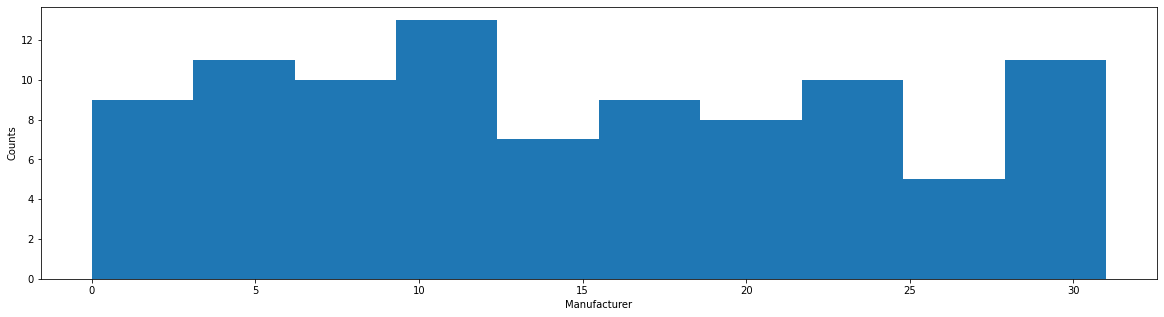

In [9]:
# --- Visualizar algunos datos

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
plt.hist(data['Manufacturer'])
plt.xlabel('Manufacturer')
plt.ylabel('Counts')
plt.show()

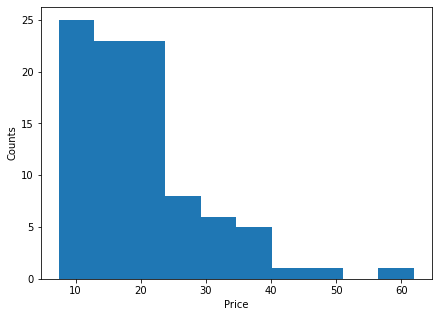

In [10]:
# --- Visualizar algunos datos

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.hist(data['Price'])
plt.xlabel('Price')
plt.ylabel('Counts')
plt.show()

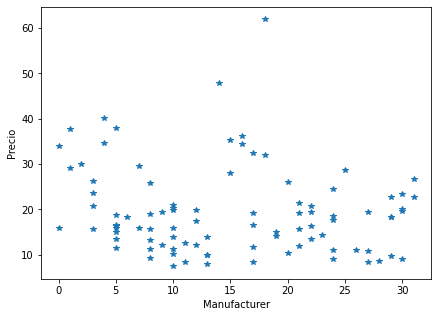

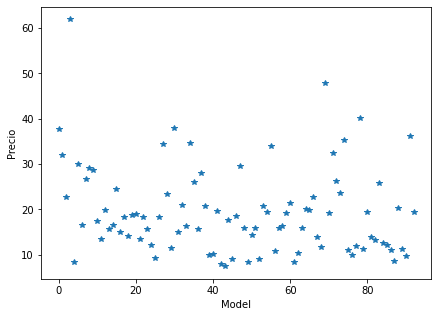

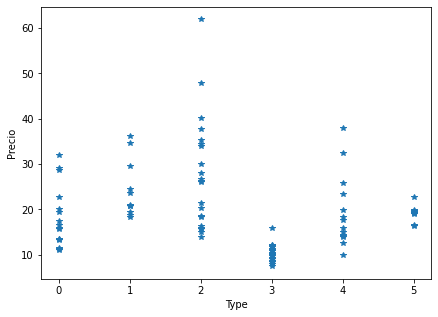

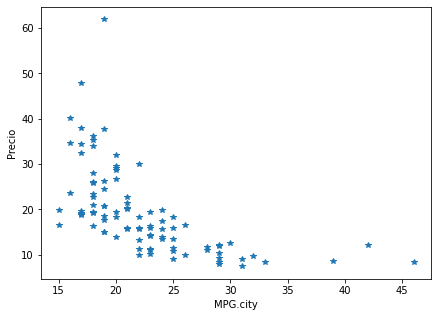

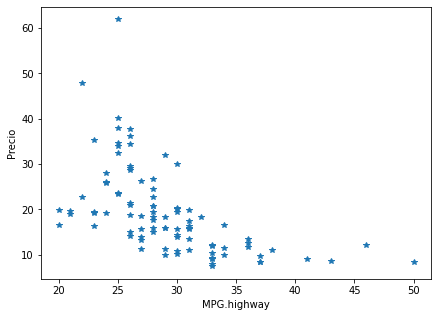

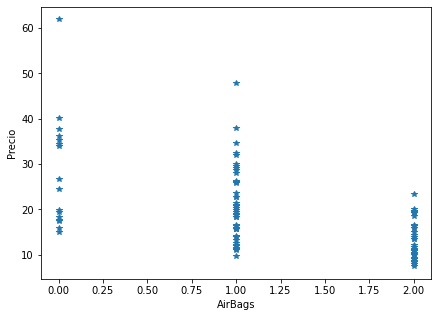

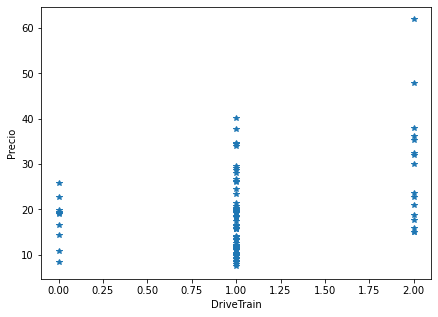

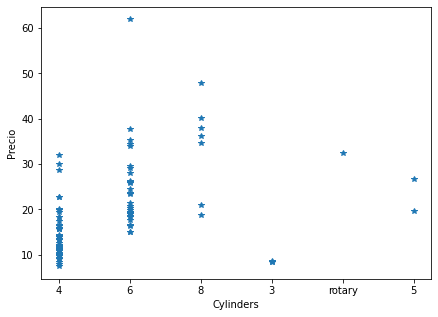

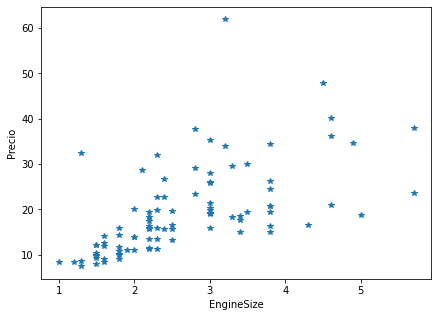

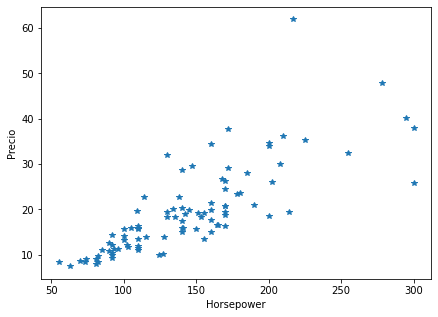

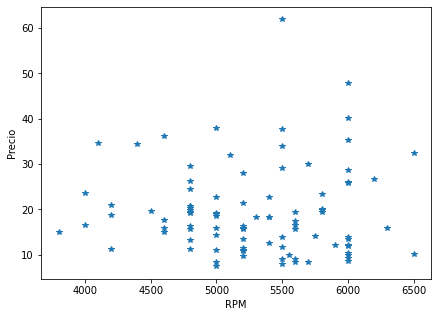

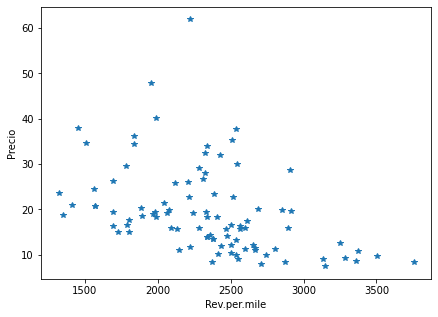

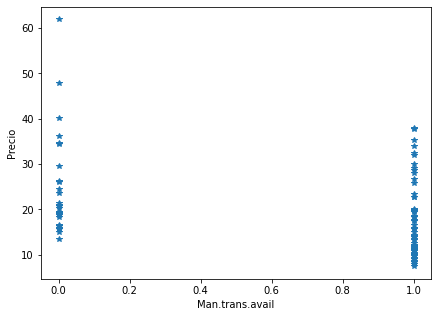

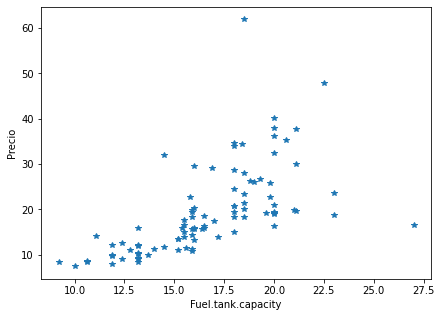

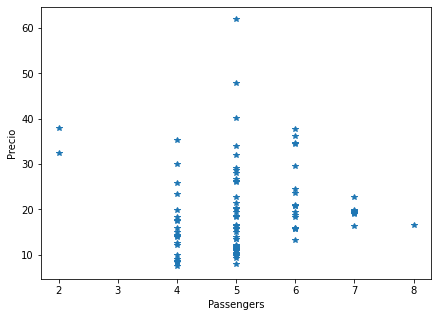

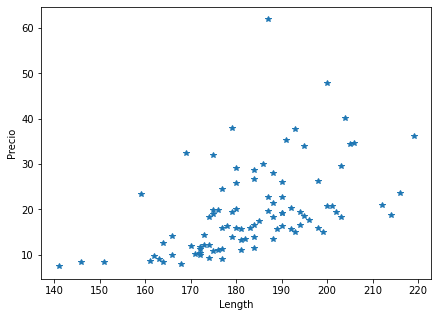

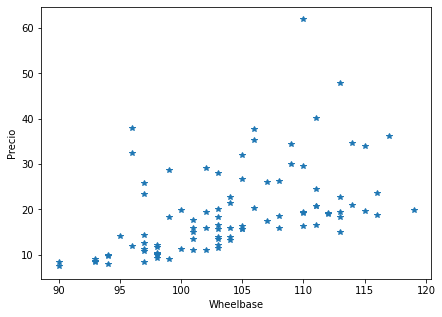

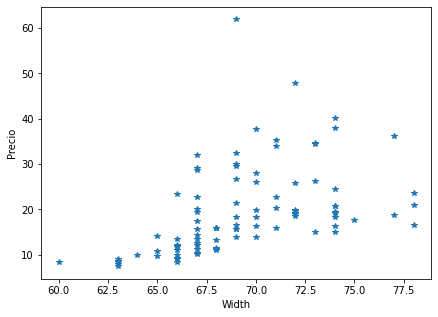

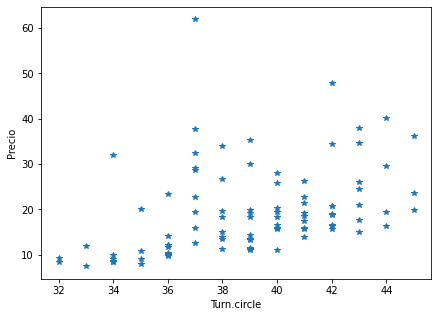

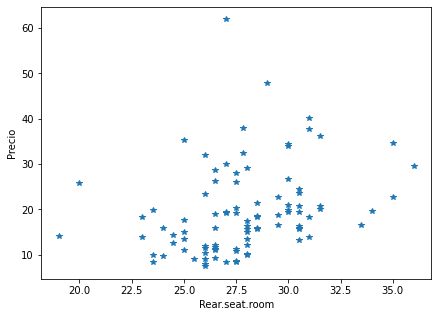

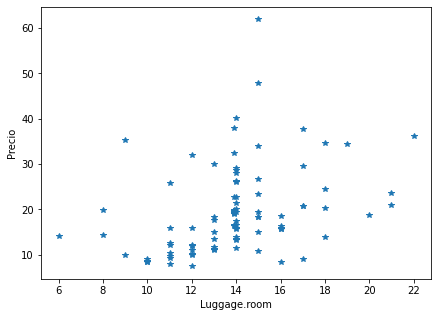

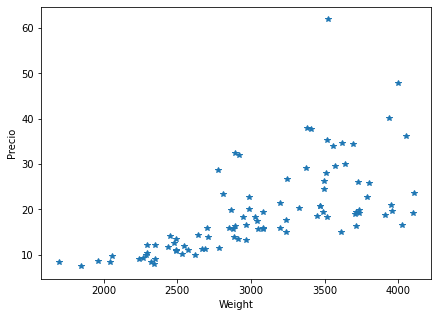

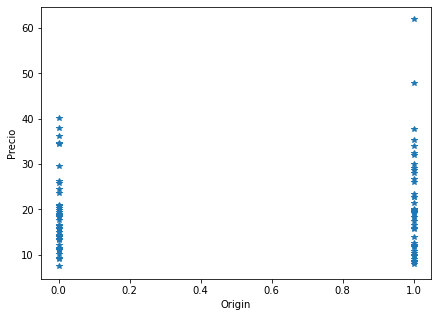

In [11]:
# --- Visualizar el objetivo (Precio)
# --- Clasificación Visual

for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel('Precio')
  plt.show()

# --- 

In [12]:
# --- Cambiar objetivo a binario

import numpy as np

Y = data['Price']
np.unique(Y, return_counts=True)

print(np.unique(Y, return_counts=True))

Y[Y<25] = 0 # Precio Bajo
Y[Y>=25] = 1 # Precio Alto

print(np.unique(Y, return_counts=True))

(array([ 7.4,  8. ,  8.3,  8.4,  8.6,  9. ,  9.1,  9.2,  9.8, 10. , 10.1,
       10.3, 10.9, 11.1, 11.3, 11.4, 11.6, 11.8, 12.1, 12.2, 12.5, 13.3,
       13.4, 13.5, 13.9, 14. , 14.1, 14.4, 14.9, 15.1, 15.6, 15.7, 15.8,
       15.9, 16.3, 16.5, 16.6, 17.5, 17.7, 18.2, 18.4, 18.5, 18.8, 19. ,
       19.1, 19.3, 19.5, 19.7, 19.8, 19.9, 20. , 20.2, 20.7, 20.8, 20.9,
       21.5, 22.7, 23.3, 23.7, 24.4, 25.8, 26.1, 26.3, 26.7, 28. , 28.7,
       29.1, 29.5, 30. , 31.9, 32.5, 33.9, 34.3, 34.7, 35.2, 36.1, 37.7,
       38. , 40.1, 47.9, 61.9]), array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
(array([0., 1.]), array([72, 21]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


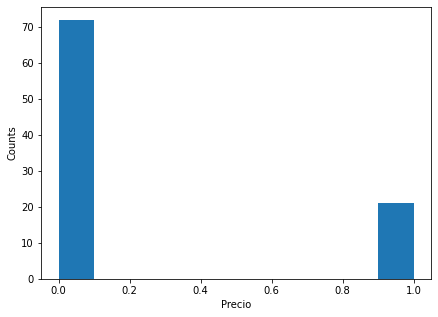

In [13]:
# --- Visualizar objetivo binario

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.xlabel('Precio')
plt.ylabel('Counts')
plt.show()

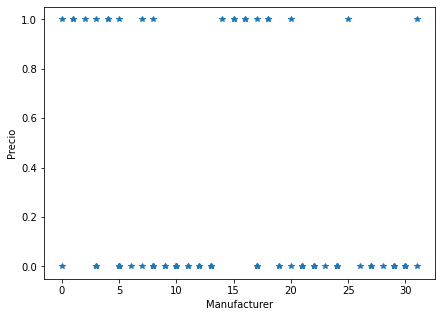

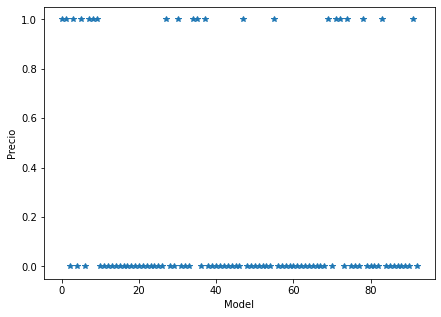

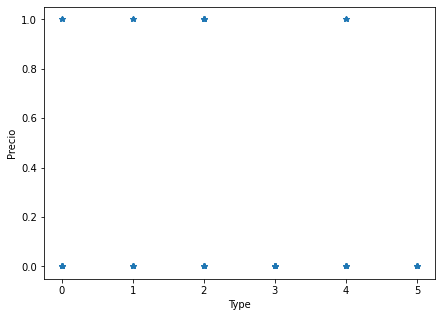

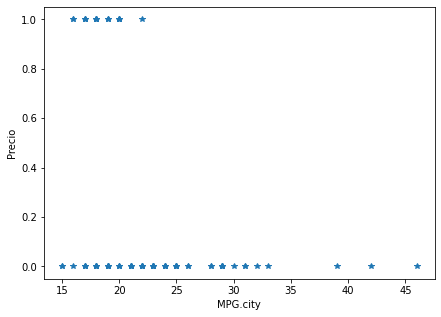

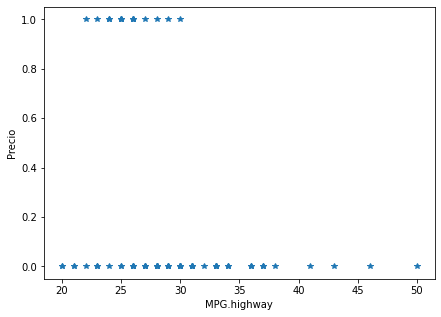

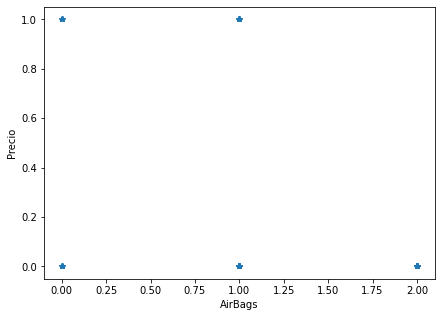

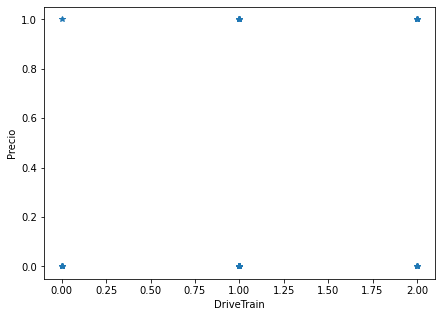

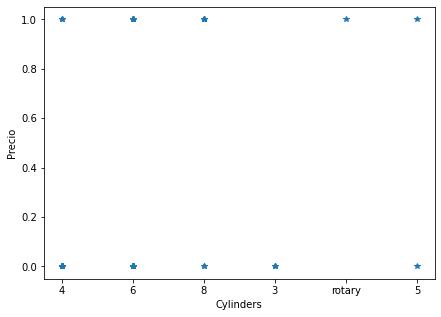

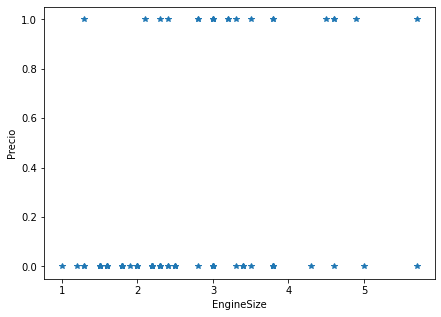

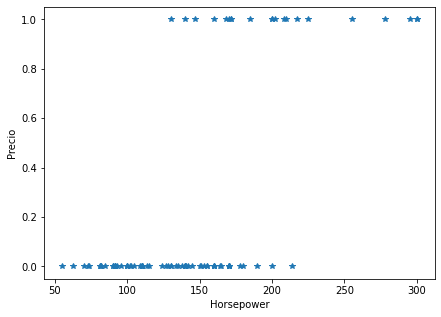

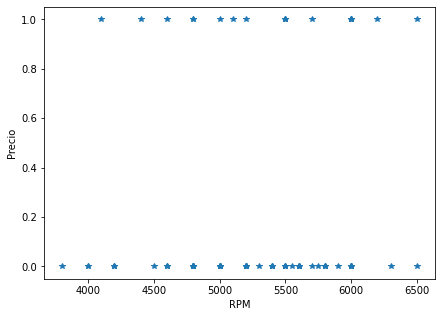

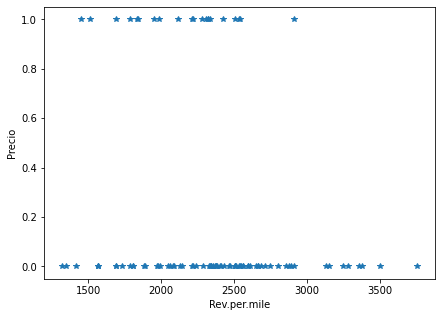

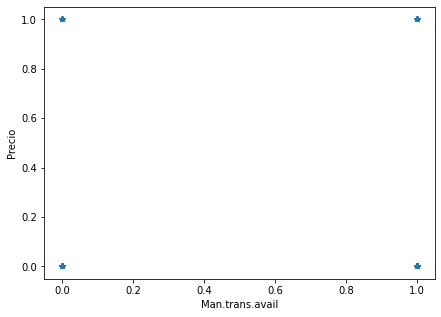

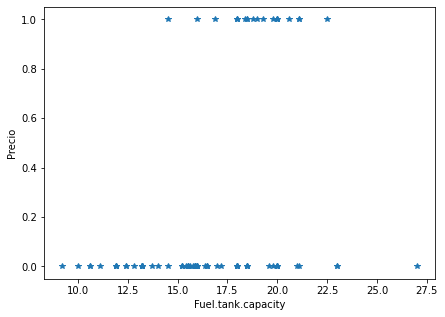

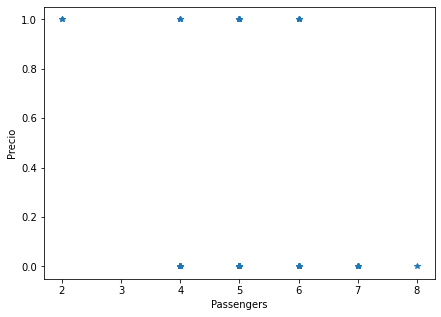

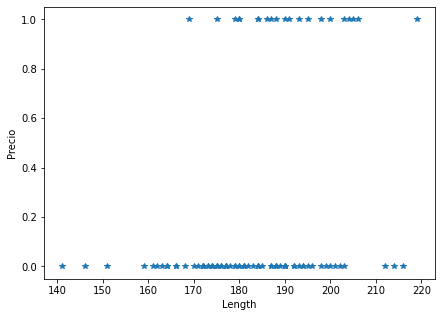

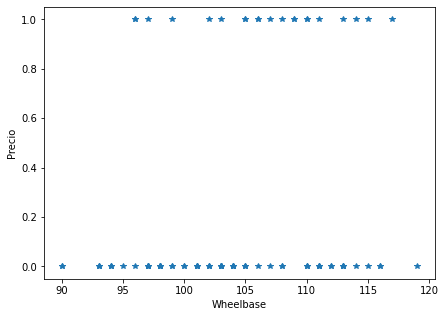

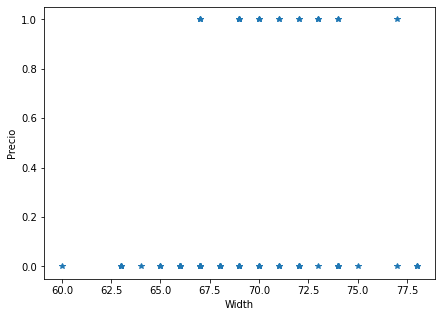

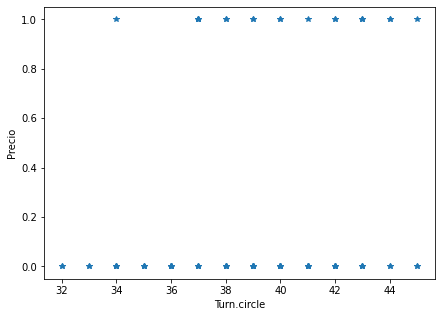

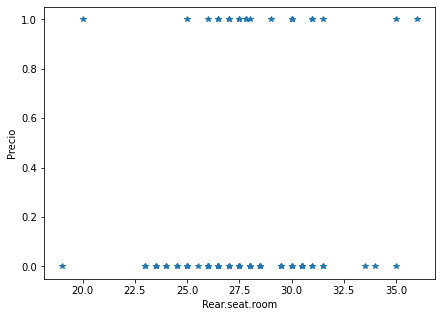

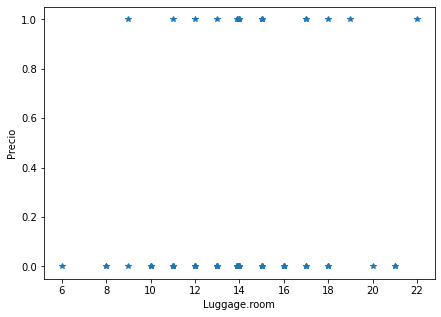

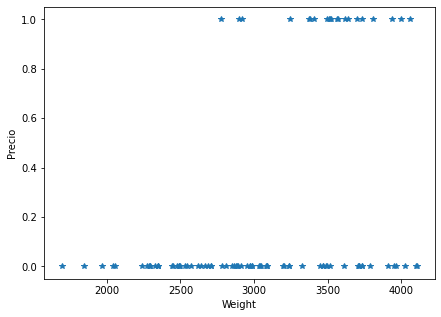

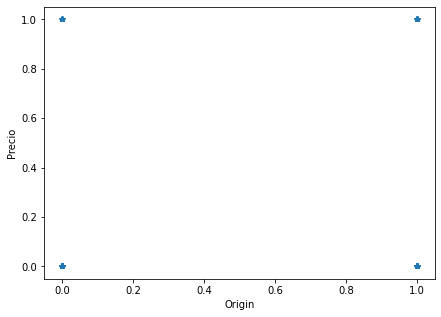

In [14]:
# --- Inspección visual binaria
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],Y,'*')
  plt.xlabel(k)
  plt.ylabel('Precio')
  plt.show()

In [15]:
!pip install corner

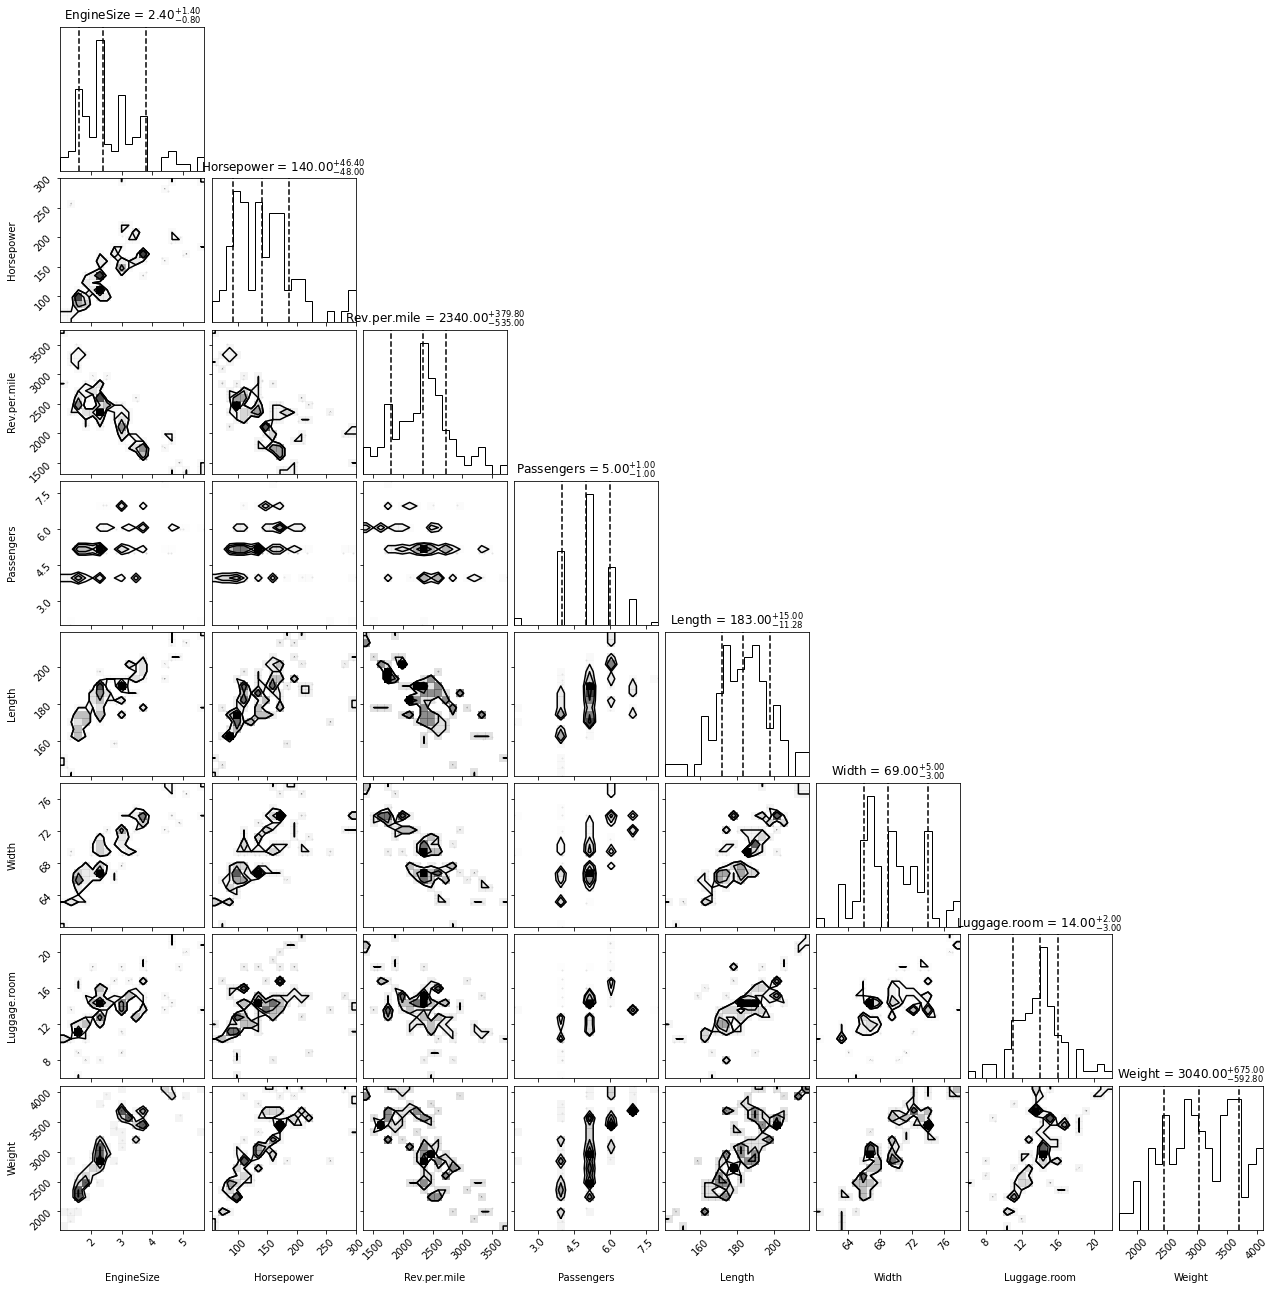

In [16]:
# --- Tomamos como llaves los parámetros que muestran una relación más clara con el objetivo
keys = ['EngineSize', 'Horsepower', 'Rev.per.mile','Passengers', 'Length', 'Width', 'Luggage.room',
        'Weight']

import corner

figure = corner.corner(data[keys], labels=keys, quantiles=[0.16,0.5,0.84], show_titles=True)

In [17]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data[keys])

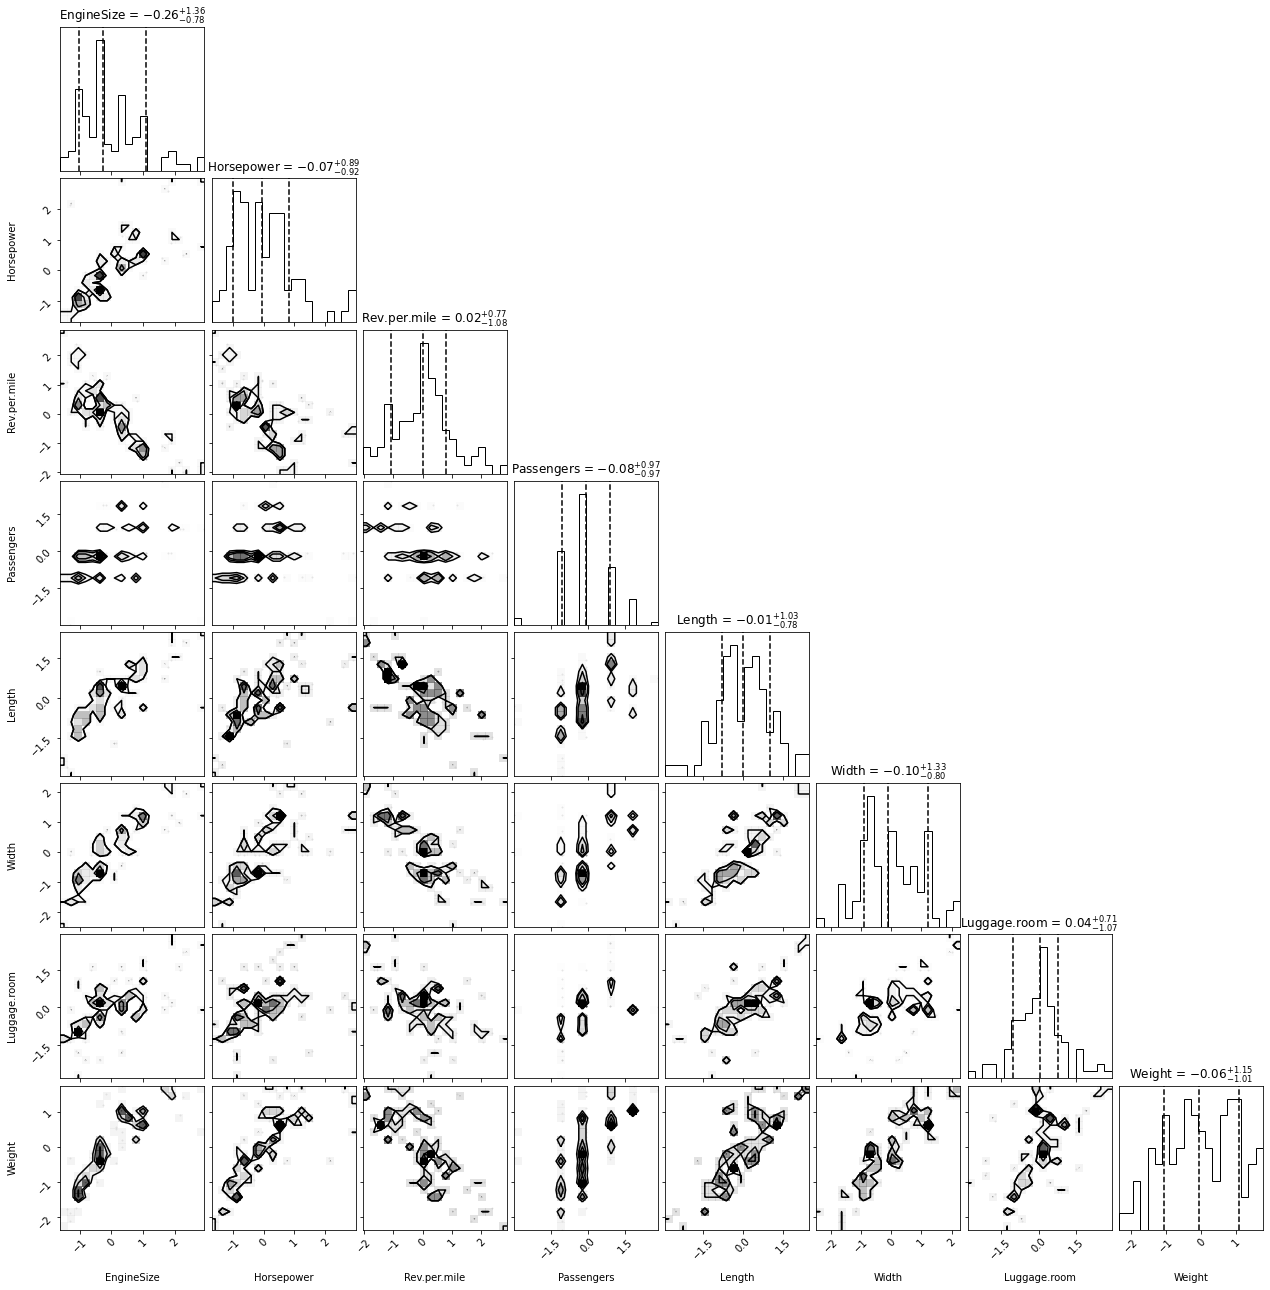

In [18]:
import corner

figure = corner.corner(data_scaled, labels=keys, quantiles=[0.16,0.5,0.84], show_titles=True)

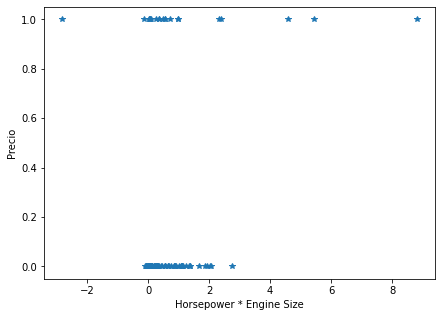

In [19]:
# --- Probando algunas combinaciones lineales
#['EngineSize','Horsepower', 'Rev.per.mile','Passengers', 'Length', 'Width', 'Luggage.room', 'Weight']

fig = plt.figure(figsize=(7,5))
plt.plot(data_scaled[:,1]*data_scaled[:,0],Y,'*')
plt.xlabel('Horsepower * Engine Size')
plt.ylabel('Precio')
plt.show()

Algoritmo de Machine Learning:

Hipótesis: El Horsepower y el Engine Size son los parámetros determinantes en el precio del auto.

In [20]:
# --- Cargar el método de Bosque Aleatorio

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
#--- Importamos algunos métodos de sklearn

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data[keys]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [22]:
#--- Calculamos la precisión (accuracy)

acc = sum(Y_pred == Y_test)/len(Y_test)
acc

0.8333333333333334

In [23]:
#--- Calculamos la importancia de los parámetros.
importances = model.feature_importances_
importances

array([0.11831067, 0.33476476, 0.1056233 , 0.07634708, 0.07880954,
       0.08051177, 0.06365431, 0.14197855])

In [24]:
#--- Organizamos los parámetros de menor a mayor.
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['Horsepower', 'Weight', 'EngineSize', 'Rev.per.mile', 'Width',
       'Length', 'Passengers', 'Luggage.room'], dtype='<U12')

Según el método realizado, el Horsepower y el Weight son las variables más importantes para predecir el precio de un carro.